<a href="https://colab.research.google.com/github/nce-saloma/eviction-data/blob/main/FinalProject_CST3512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**URL for Evictions Database: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4/about_data**


In [ ]:
# Code to import different Python libraries & access dataset from Google Drive

!sudo apt-get install -y -qq  libgeos-dev libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev
!sudo pip install -U shapely rtree pygeos

!sudo pip install geopandas descartes

from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import re

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

drive.mount('/content/gdrive')
evictions = pd.read_csv('/content/gdrive/MyDrive/Data Information II (CST3512)/CST 3512 Project/evictions.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Prints out top 50 results of the evictions dataset
evictions[['Eviction Address', 'Executed Date', 'Eviction Apartment Number', 'BOROUGH', 'Residential/Commercial', 'Longitude', 'Latitude']].head(50)

,Eviction Address,Executed Date,Eviction Apartment Number,BOROUGH,Residential/Commercial,Longitude,Latitude
0,136 SOUTH 2ND STREET A/K/A 326 BEDFORD AVENUE,06/28/2018,STORE NO.1,BROOKLYN,Commercial,-73.962428,40.713388
1,230 WEST 126 STREET,09/07/2023,10J,MANHATTAN,Residential,-73.948931,40.810094
2,DOUGLASTON PLAZA SHOPPING CENTER 242-02 61ST A...,11/01/2018,NaN,QUEENS,Commercial,NaN,NaN
3,514 WARWICK STREET,10/02/2017,3,BROOKLYN,Residential,-73.885253,40.671045
4,850 REV JAMES A POLI TE,11/09/2022,53,BRONX,Residential,NaN,NaN
5,554 EAST 26TH STREET,04/18/2024,6-E,BROOKLYN,Residential,-73.952670,40.636950
6,534 RALPH AVENUE,01/23/2018,NaN,BROOKLYN,Residential,-73.922376,40.671194
7,2865 UNIVERSITY AVENUE,12/11/2018,F2,BRONX,Residential,-73.898829,40.872761
8,203-14 HOLLIS AVENUE,03/22/2023,B6,QUEENS,Residential,-73.754206,40.706657
9,175 EAST 52ND STREET,01/26/2018,B10,BROOKLYN,Residential,-73.928988,40.657066


In [ ]:
# Prints out datatypes & converts executed date to datetime64

'''
Important Columns:
  - Eviction Address
  - Executed Date
  - Eviction Apartment Number
  - BOROUGH
  - Residential/Commercial
  - Longitude
  - Latitude
'''
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'])
evictions = evictions[(evictions['Executed Date'] >= "01/01/2017") & (evictions['Executed Date'] <= "01/01/2024")]
evictions.set_index('Executed Date')
evictions.dtypes

,0
Court Index Number,object
Docket Number,int64
Eviction Address,object
Eviction Apartment Number,object
Executed Date,datetime64[ns]
Marshal First Name,object
Marshal Last Name,object
Residential/Commercial,object
BOROUGH,object
Eviction Postcode,int64


In [ ]:
# Code creates subsets of the evictions dataset based on borough, if the building has apartment numbers or not, and whether the building is residental or commercial

residental = evictions[evictions['Residential/Commercial'] == 'Residential']
commercial = evictions[evictions['Residential/Commercial'] == 'Commercial']

brooklyn = residental[residental['BOROUGH'] == 'BROOKLYN']
manhattan = residental[residental['BOROUGH'] == 'MANHATTAN']
queens = residental[residental['BOROUGH'] == 'QUEENS']
staten_island = residental[residental['BOROUGH'] == 'STATEN ISLAND']
bronx = residental[residental['BOROUGH'] == 'BRONX']

brooklyn_c = commercial[commercial['BOROUGH'] == 'BROOKLYN']
manhattan_c = commercial[commercial['BOROUGH'] == 'MANHATTAN']
queens_c = commercial[commercial['BOROUGH'] == 'QUEENS']
staten_island_c = commercial[commercial['BOROUGH'] == 'STATEN ISLAND']
bronx_c = commercial[commercial['BOROUGH'] == 'BRONX']

apartments = residental.dropna(subset=['Eviction Apartment Number'])
houses = residental[evictions["Eviction Apartment Number"].isna()]

Text(0.5, 1.0, 'Evictions Map (After COVID-19)')

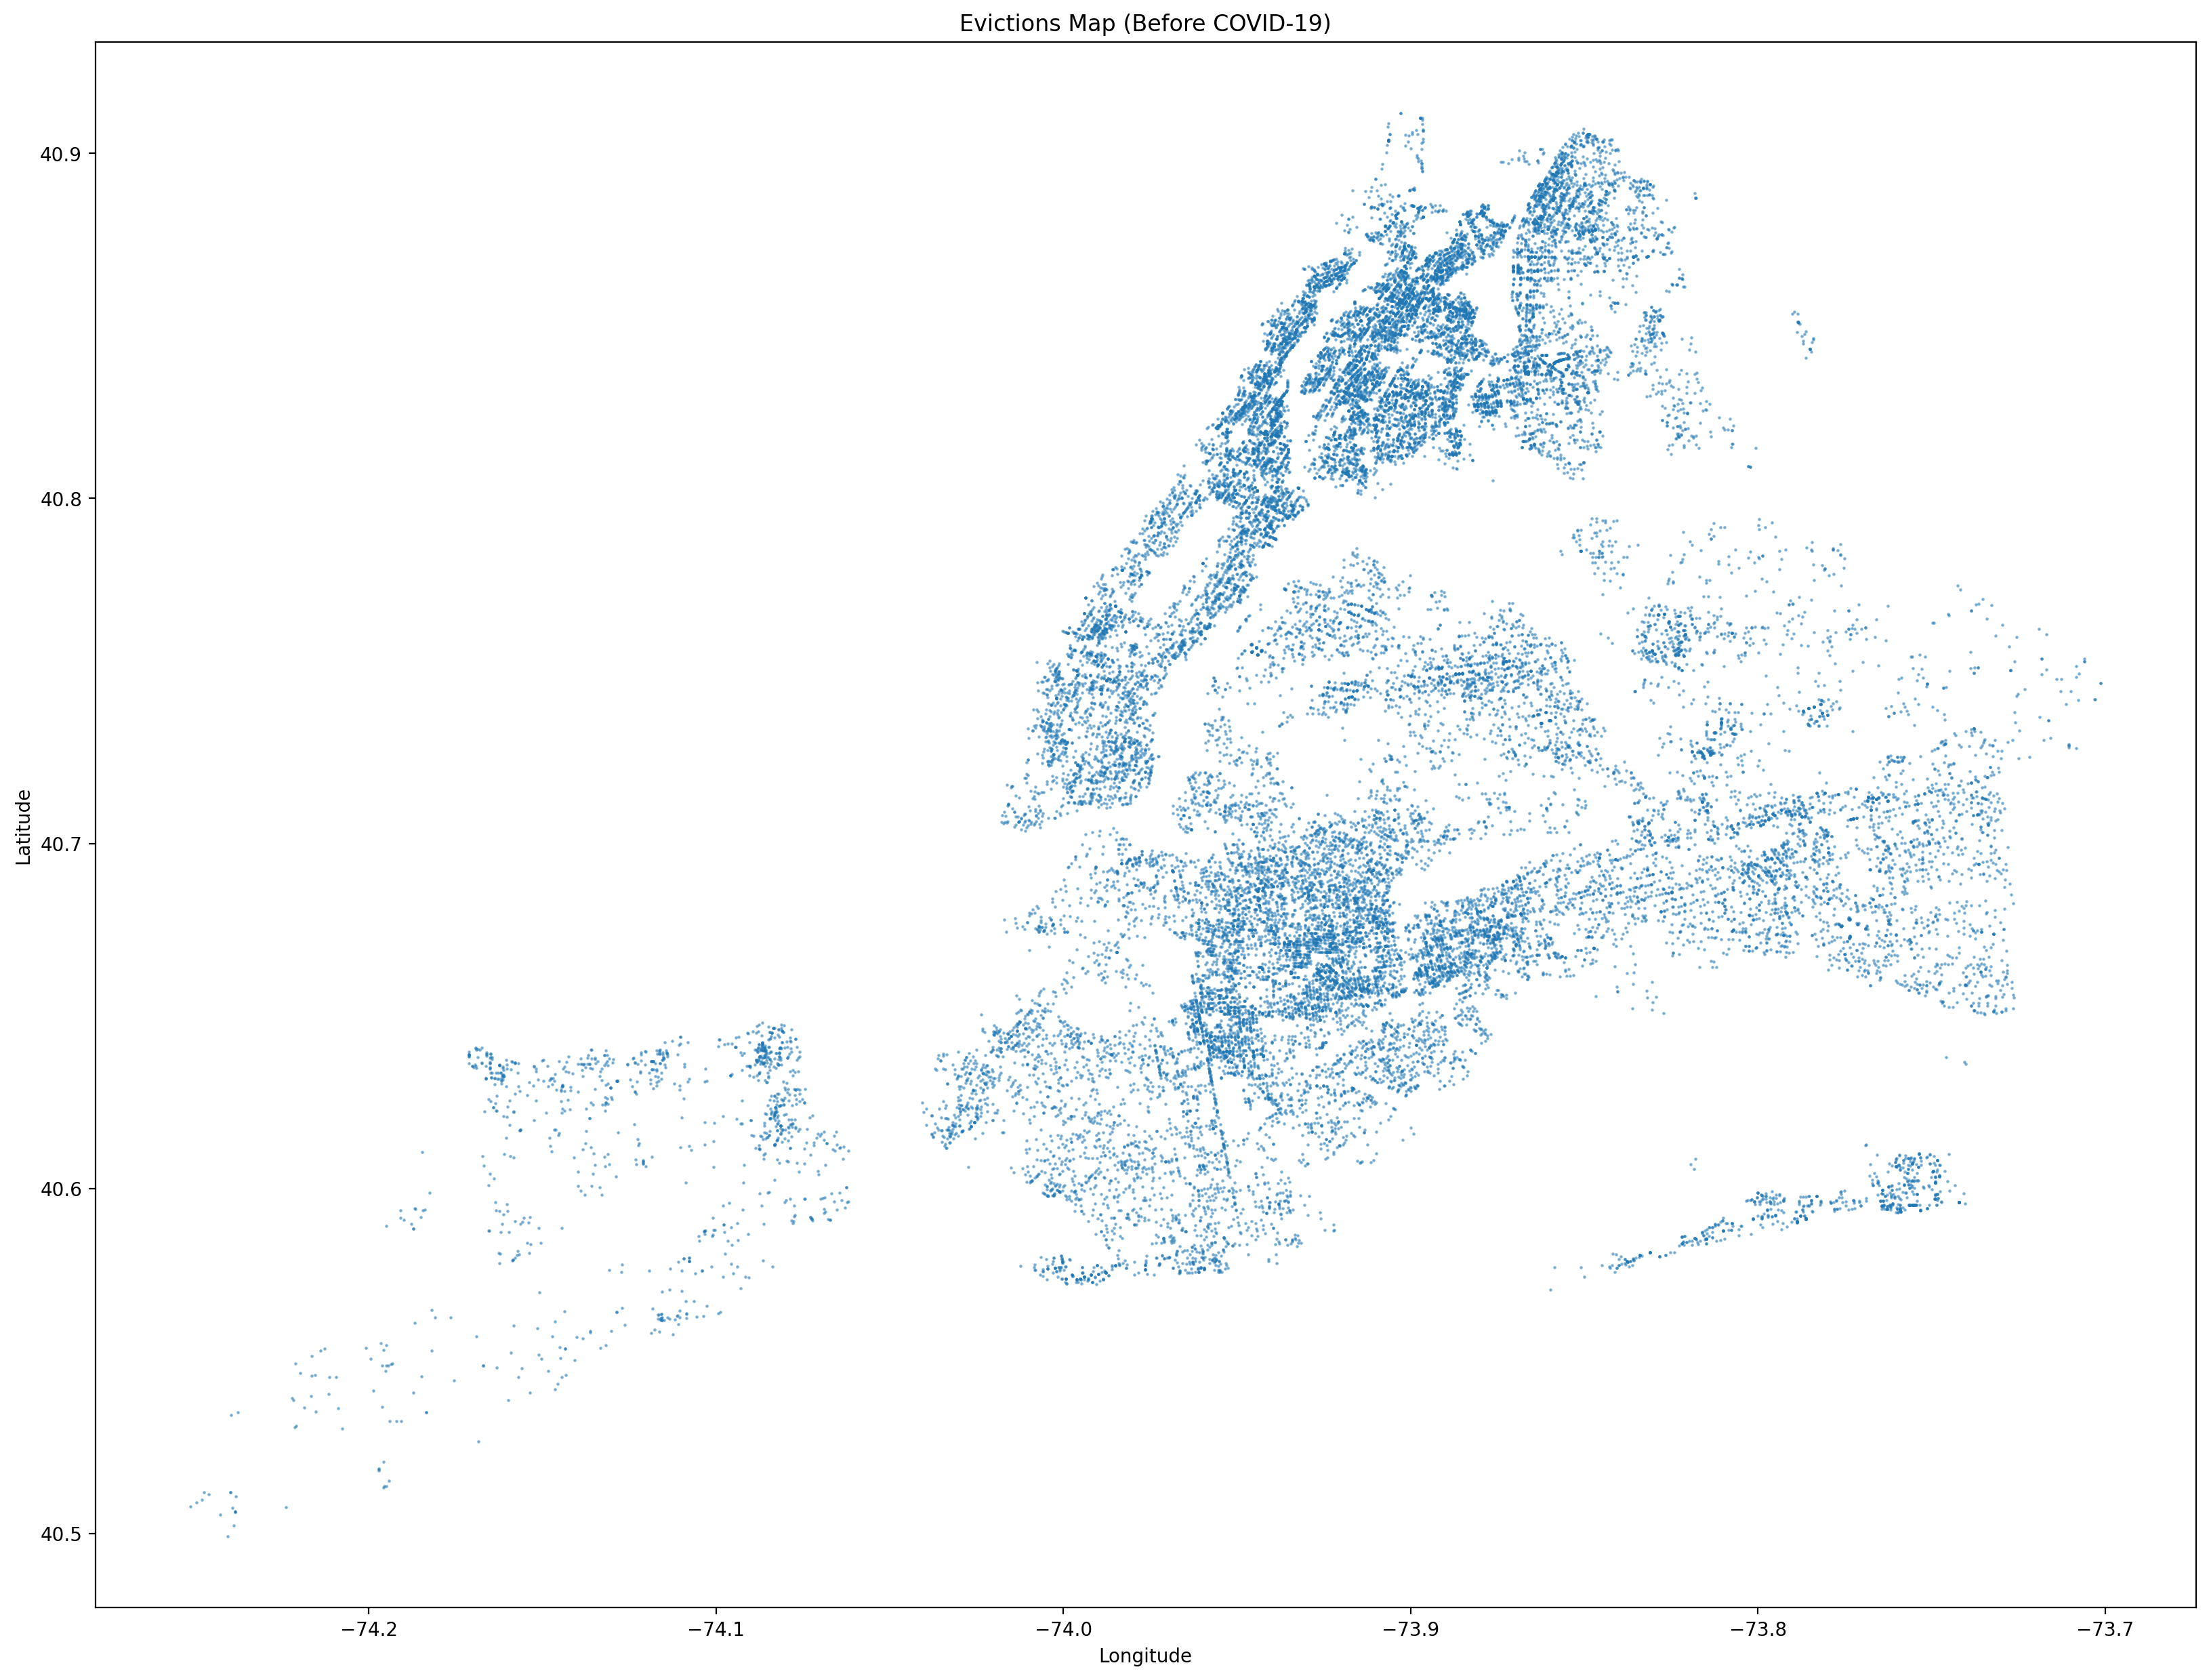

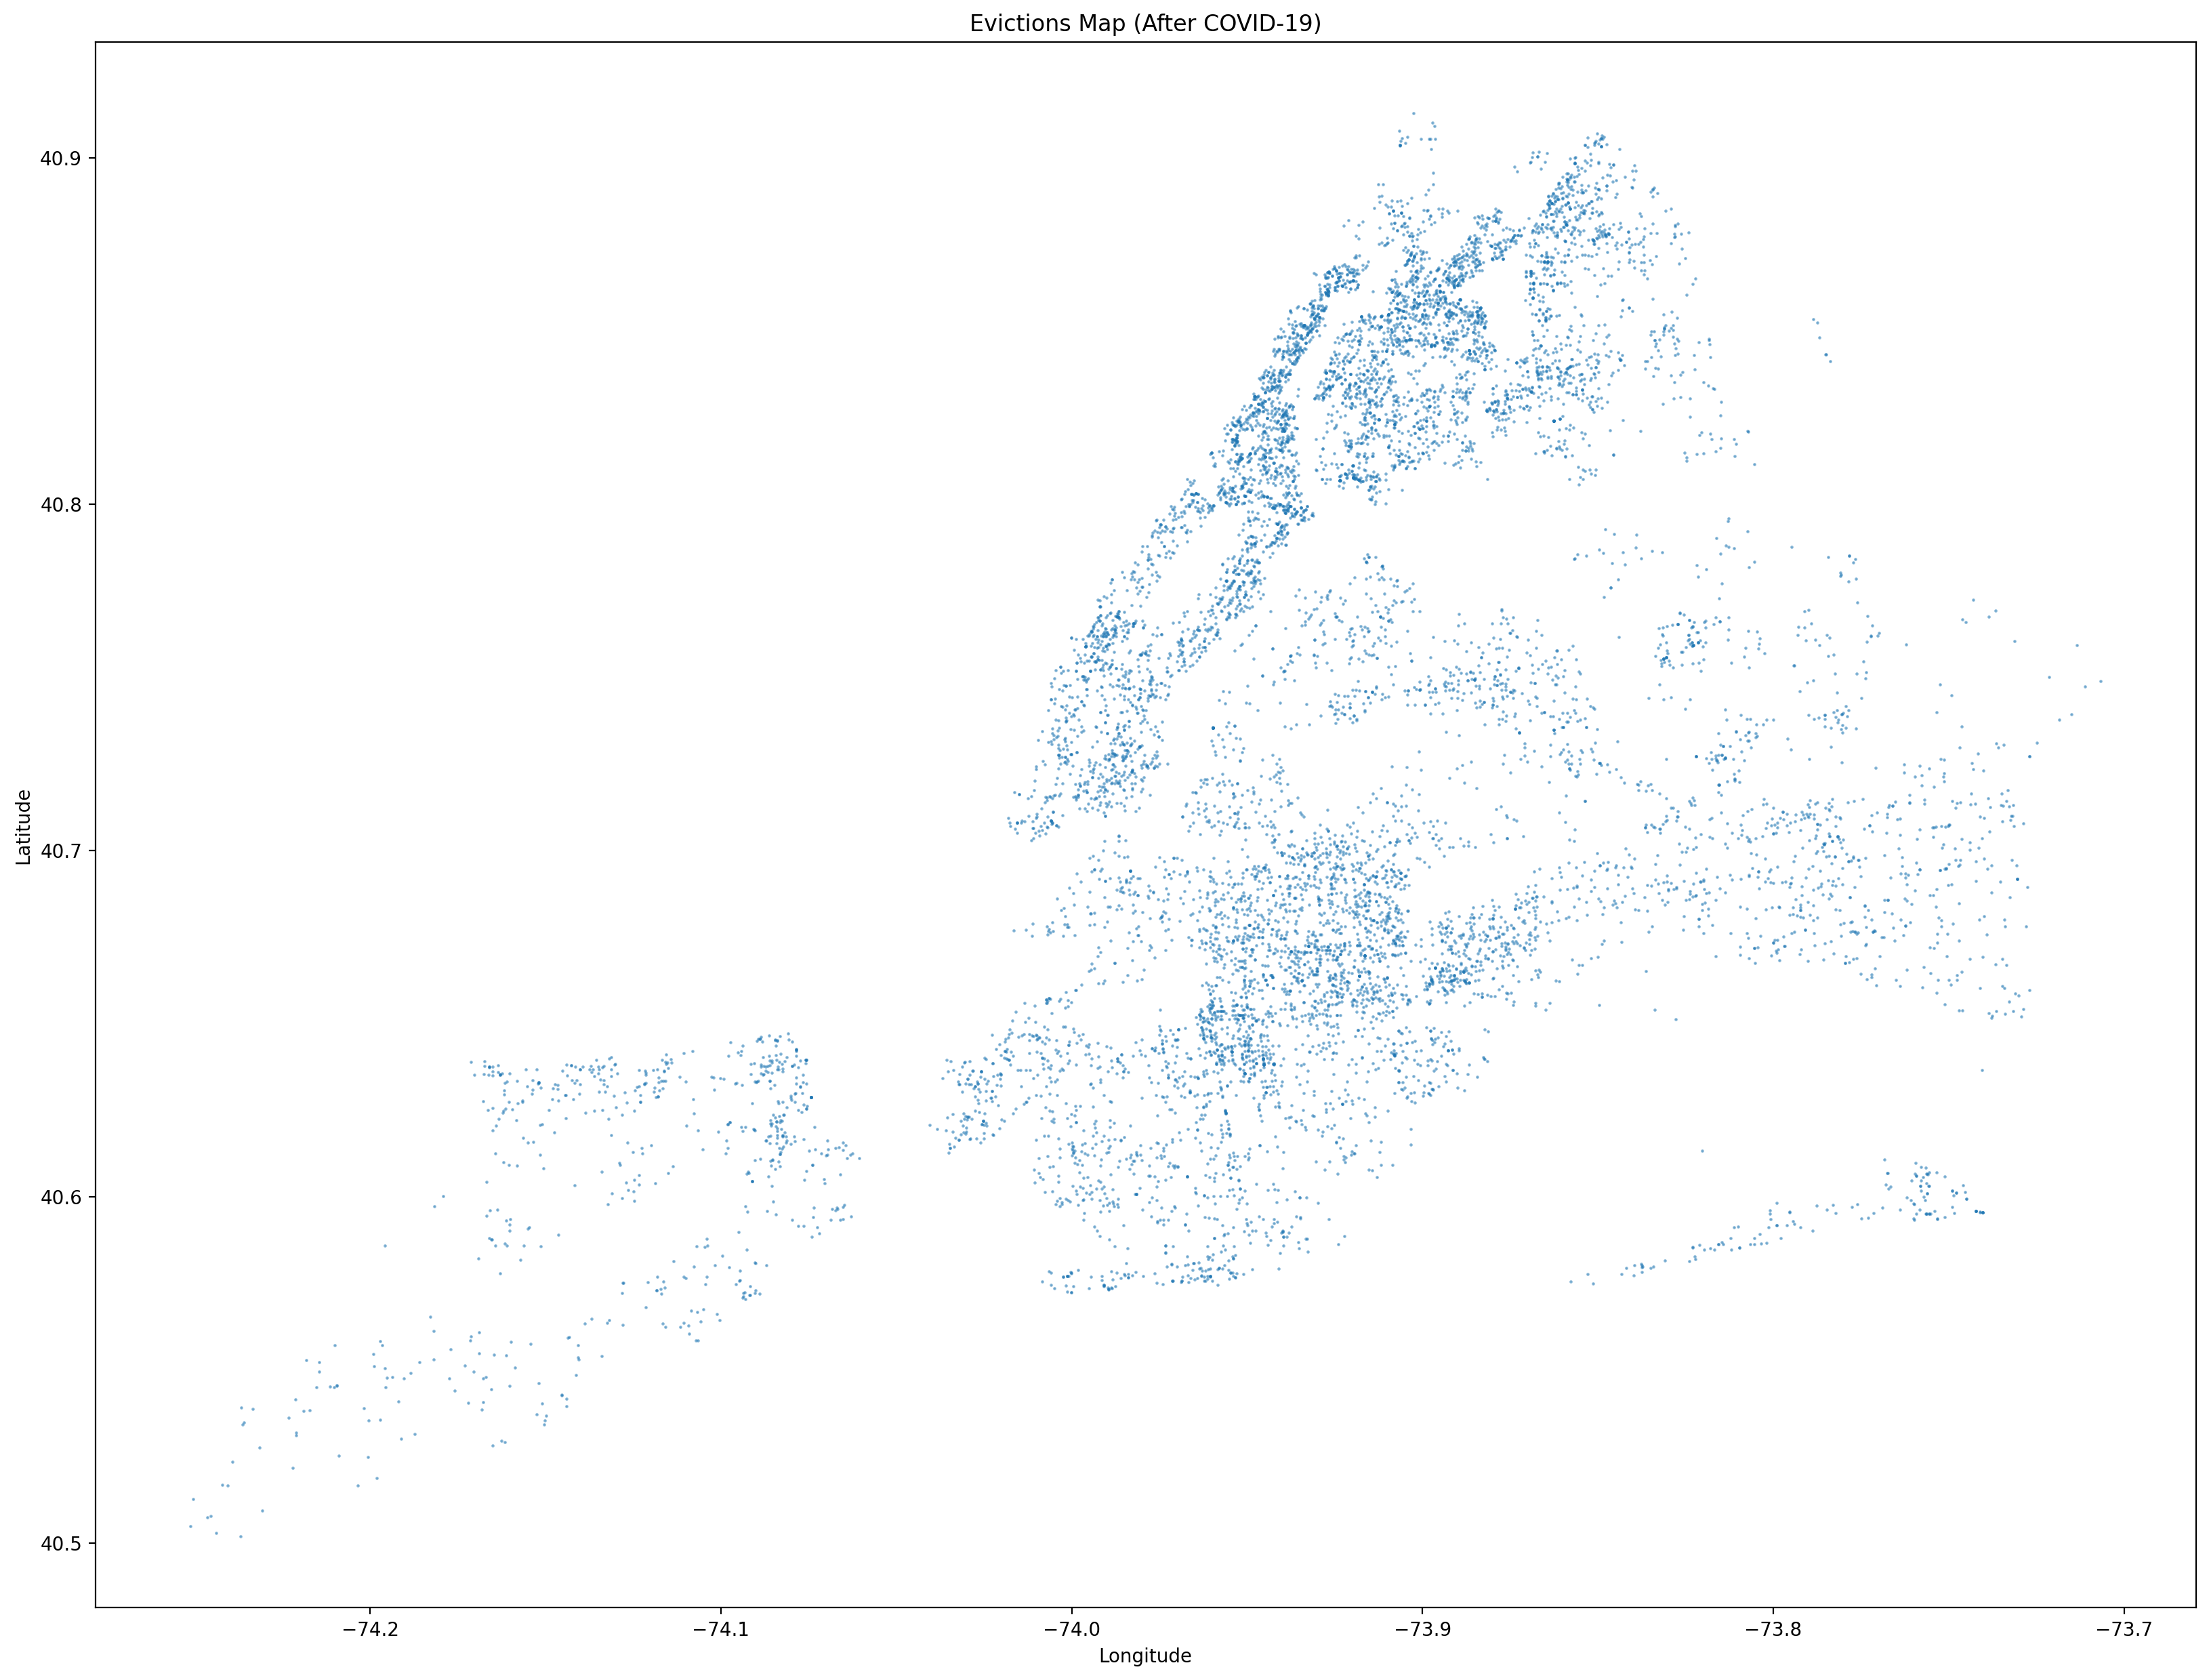

In [ ]:
eviction_duplicates_drop = evictions.drop_duplicates(subset=["Eviction Address"])
evictions_dupdrop_precovid = eviction_duplicates_drop[eviction_duplicates_drop['Executed Date'] < '2020-03-01']
evictions_dupdrop_precovid.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(20, 15), s=0.5, alpha=0.5)
plt.title('Evictions Map (Before COVID-19)')

evictions_dupdrop_postcovid = eviction_duplicates_drop[eviction_duplicates_drop['Executed Date'] > '2022-01-01']
evictions_dupdrop_postcovid.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(20, 15), s=0.5, alpha=0.5)
plt.title('Evictions Map (After COVID-19)')

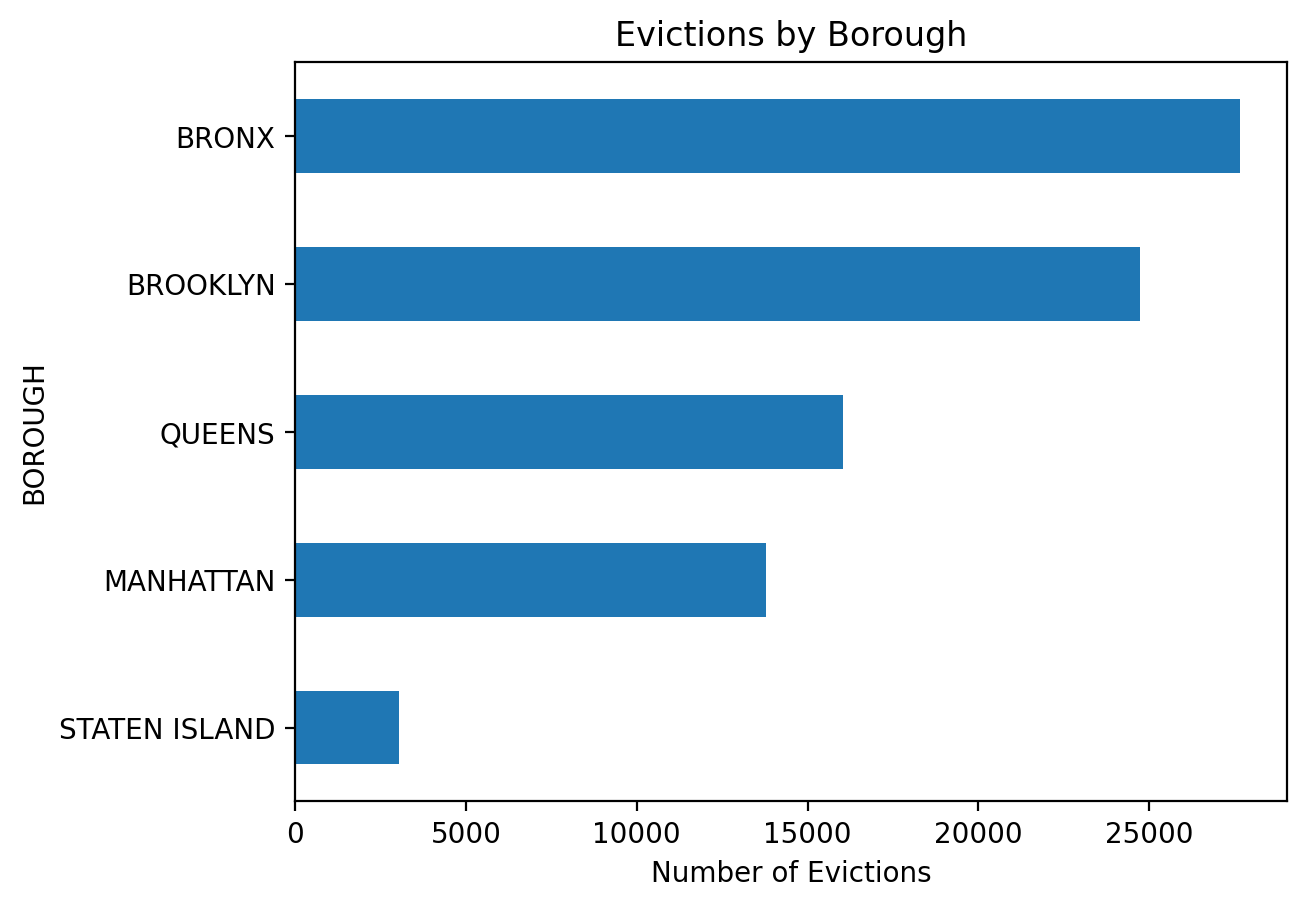

In [ ]:
borough_counts = evictions['BOROUGH'].value_counts().sort_values(ascending=True)
borough_counts.plot(kind='barh')
plt.title('Evictions by Borough')
plt.xlabel('Number of Evictions')
plt.show()

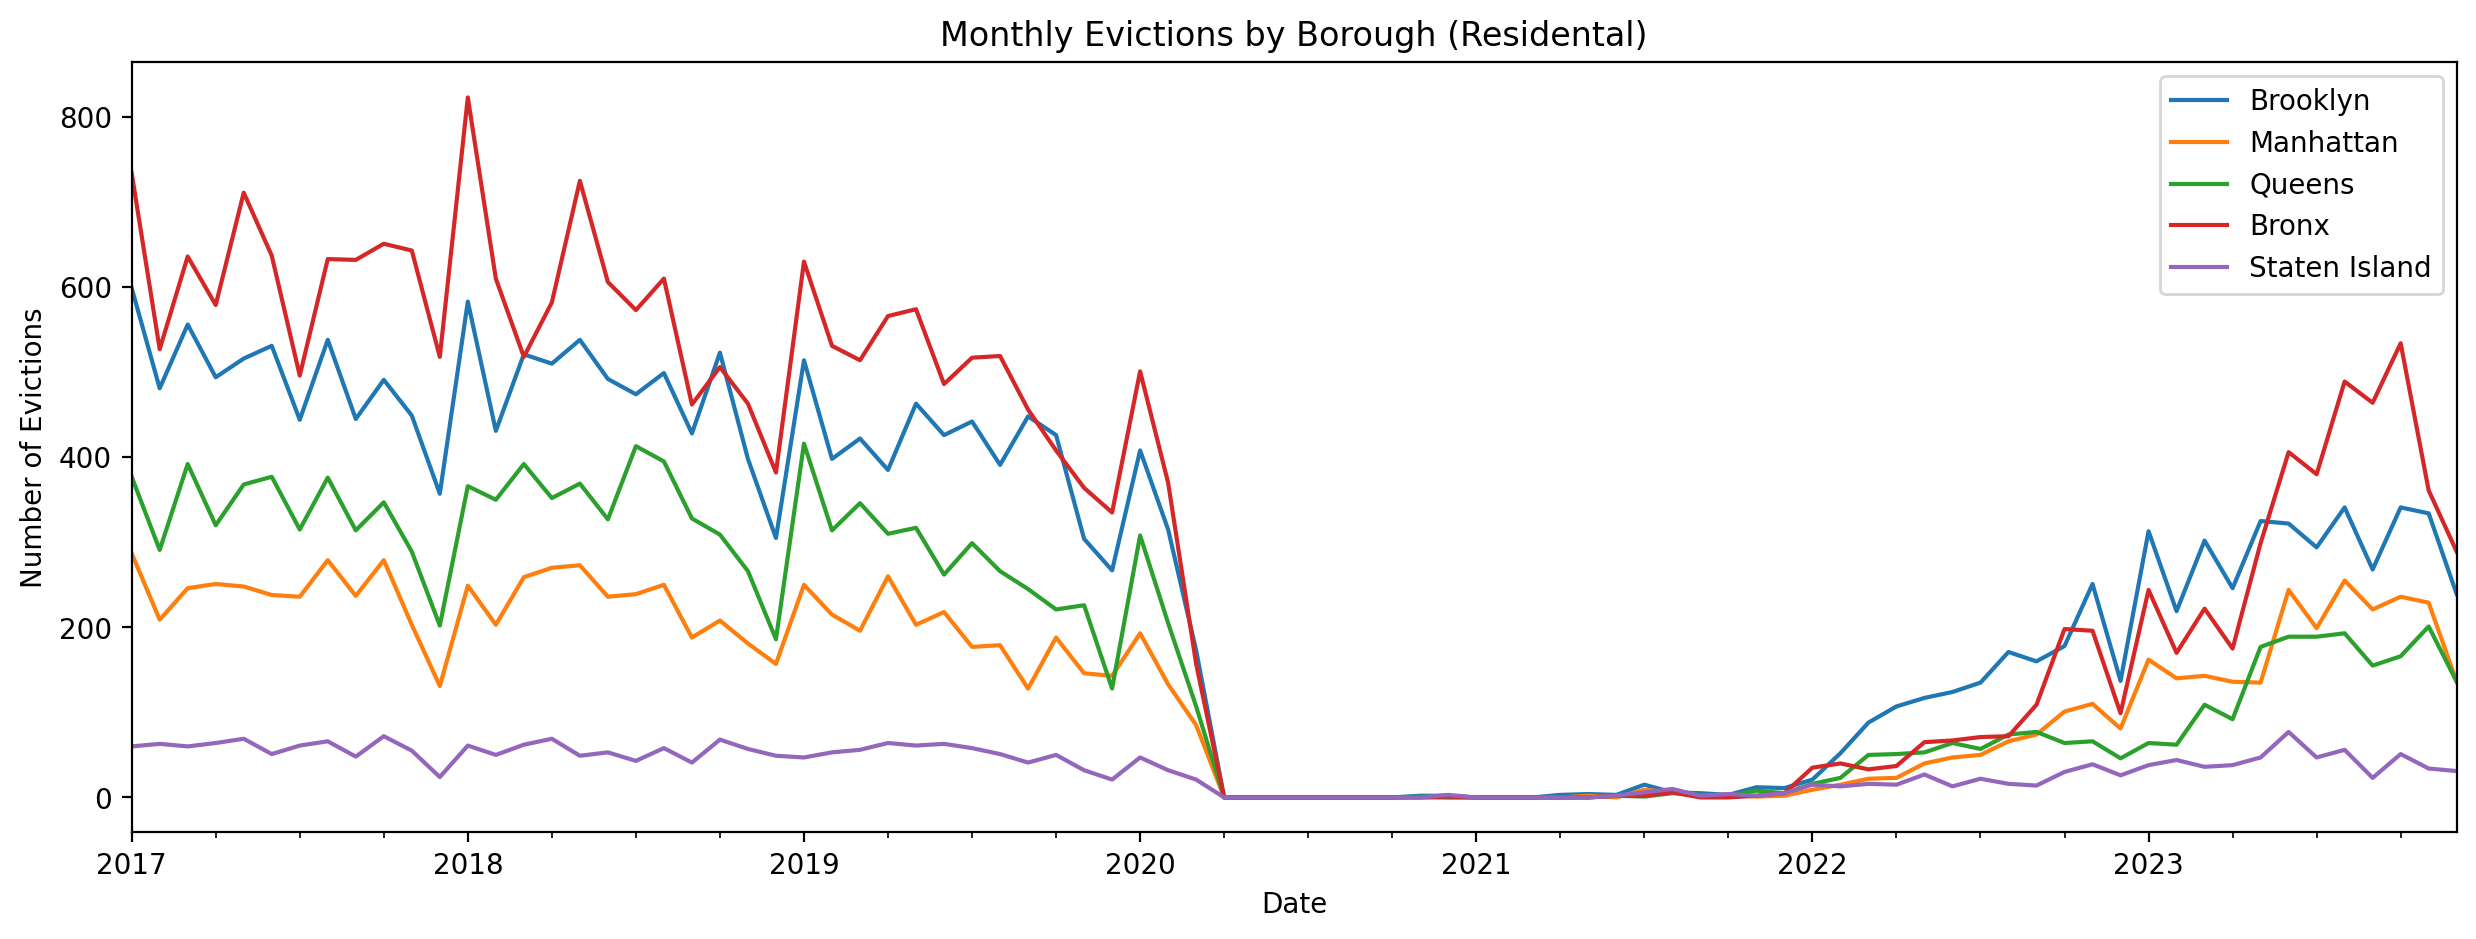

KeyboardInterrupt: 

<Figure size 1500x500 with 0 Axes>

In [ ]:
brooklyn_monthly = brooklyn['Executed Date'].value_counts().sort_index().resample('ME').sum()
manhattan_monthly = manhattan['Executed Date'].value_counts().sort_index().resample('ME').sum()
queens_monthly = queens['Executed Date'].value_counts().sort_index().resample('ME').sum()
bronx_monthly = bronx['Executed Date'].value_counts().sort_index().resample('ME').sum()
staten_island_monthly = staten_island['Executed Date'].value_counts().sort_index().resample('ME').sum()

all_boroughs = pd.DataFrame({
    'Brooklyn': brooklyn_monthly,
    'Manhattan': manhattan_monthly,
    'Queens': queens_monthly,
    'Bronx': bronx_monthly,
    'Staten Island': staten_island_monthly
})

all_boroughs.plot(figsize=(15, 5))
plt.title('Monthly Evictions by Borough (Residental)')
plt.xlabel('Date')
plt.ylabel('Number of Evictions')
plt.legend(loc='best')
plt.show()

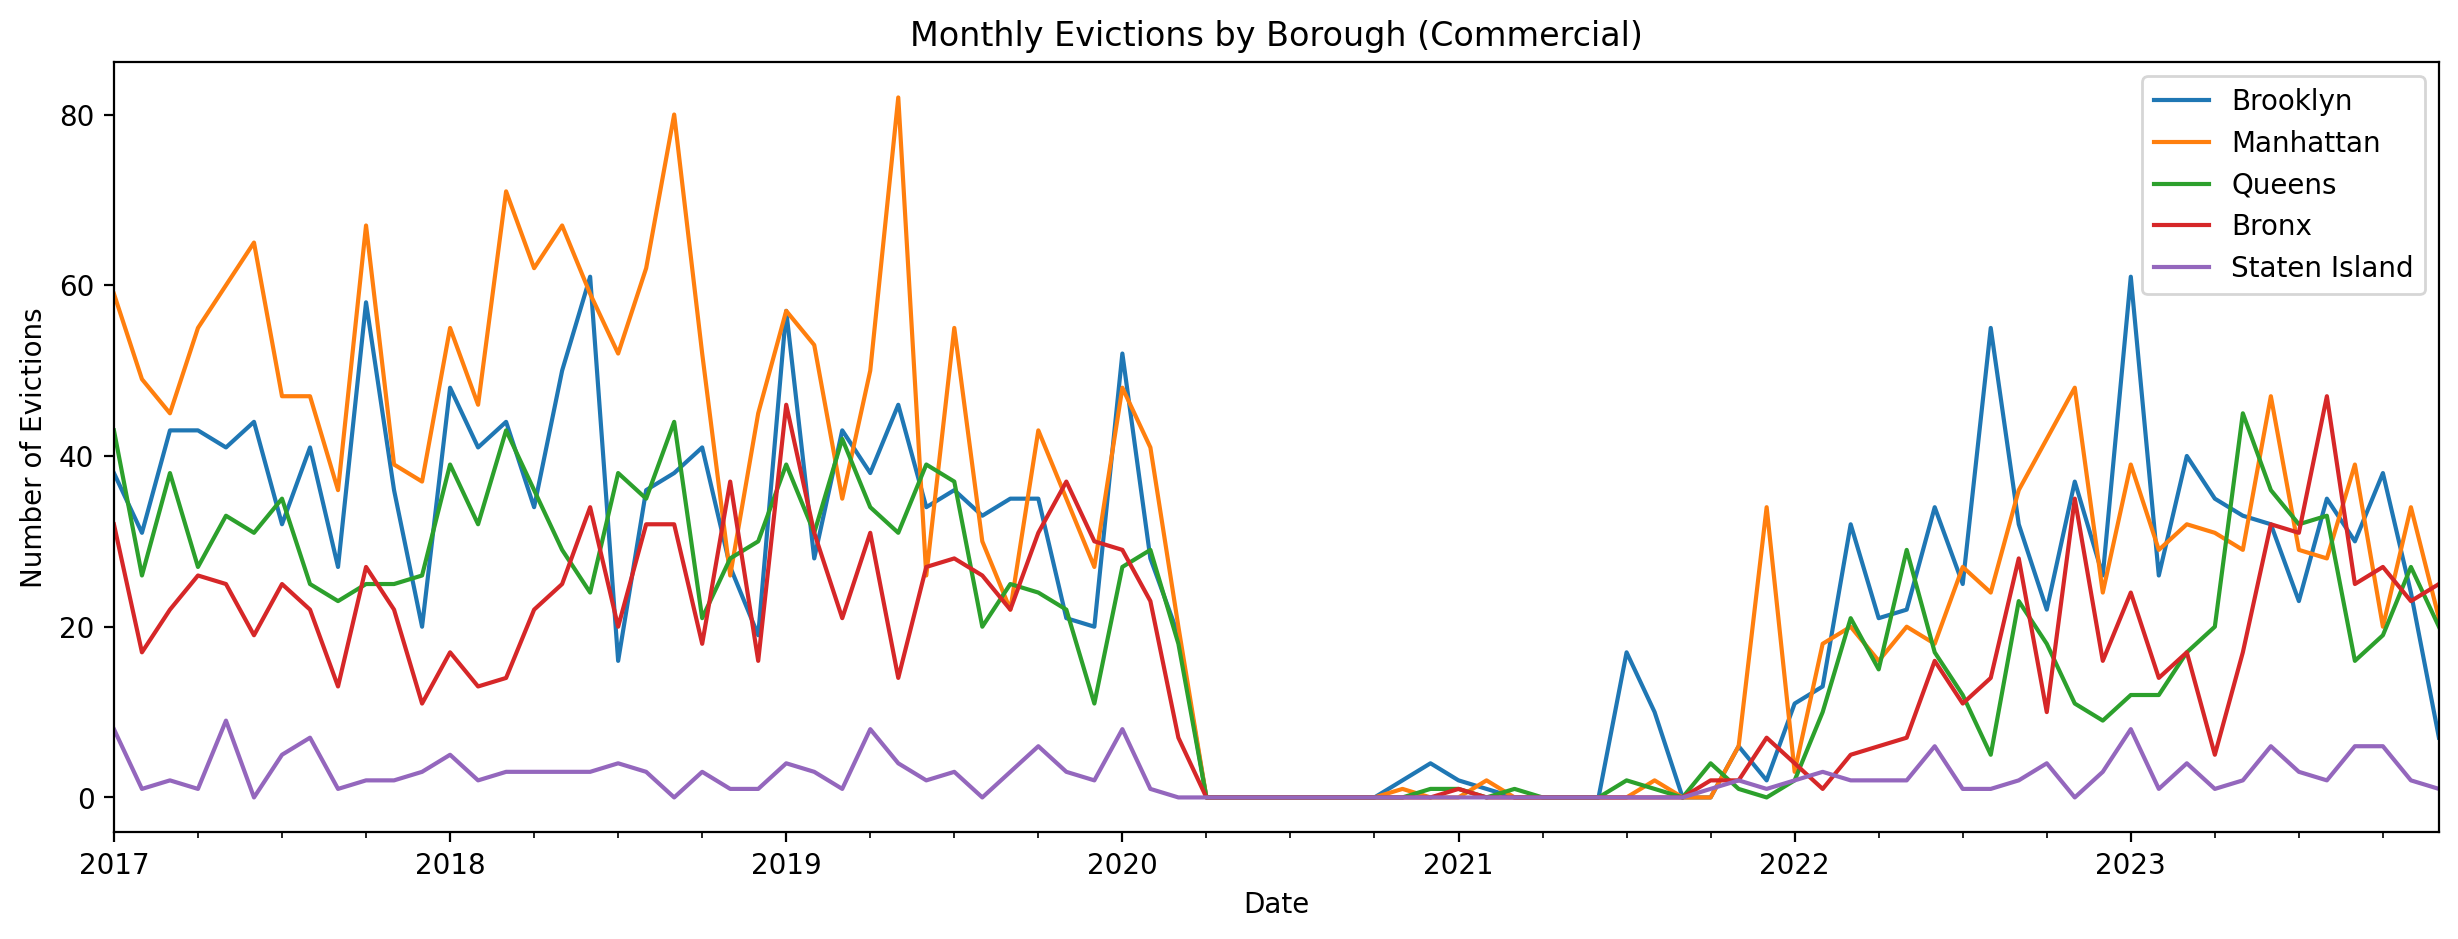

In [ ]:
brooklyn_monthly_c = brooklyn_c['Executed Date'].value_counts().sort_index().resample('ME').sum()
manhattan_monthly_c = manhattan_c['Executed Date'].value_counts().sort_index().resample('ME').sum()
queens_monthly_c = queens_c['Executed Date'].value_counts().sort_index().resample('ME').sum()
bronx_monthly_c = bronx_c['Executed Date'].value_counts().sort_index().resample('ME').sum()
staten_island_monthly_c = staten_island_c['Executed Date'].value_counts().sort_index().resample('ME').sum()

all_boroughs_c = pd.DataFrame({
    'Brooklyn': brooklyn_monthly_c,
    'Manhattan': manhattan_monthly_c,
    'Queens': queens_monthly_c,
    'Bronx': bronx_monthly_c,
    'Staten Island': staten_island_monthly_c
})

all_boroughs_c.plot(figsize=(15, 5))
plt.title('Monthly Evictions by Borough (Commercial)')
plt.xlabel('Date')
plt.ylabel('Number of Evictions')
plt.legend(loc='best')
plt.show()

In [ ]:
evictions['Residential/Commercial'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Residential/Commercial Distribution')
plt.show()

In [ ]:
residental_apartments = residental.dropna(subset=['Eviction Apartment Number'])

residental_count = residental_apartments.groupby(['BOROUGH', 'Eviction Address'])['Eviction Address'].count().reset_index(name='Count')
residental_db = pd.DataFrame(residental_count)
residental_db = residental_db.sort_values(by=['Count'])
residental_db = residental_db.loc[residental_db['Count'] > 1]
residental_db['BOROUGH'].value_counts().sort_values(ascending=True).plot.pie(autopct='%1.1f%%')
plt.show()
print(residental_db.sort_values(by=['Count'], ascending=False).head(10))